#### Implement Classification Tree on Synthetic Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from DT import ClassificationTree, evaluate_model, create_contour_plot

##### 1. Display plots that illustrate a Classification Tree with no regulation on non-linearly separable multi-class data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



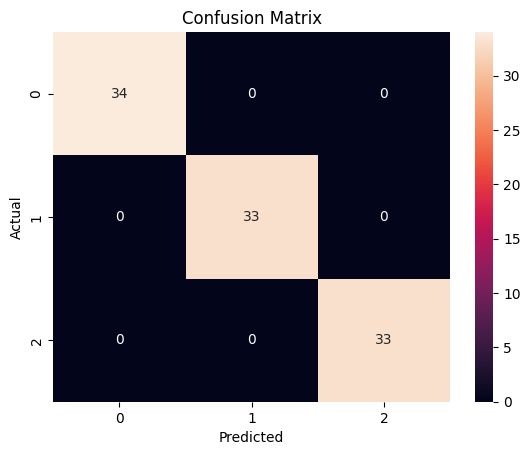

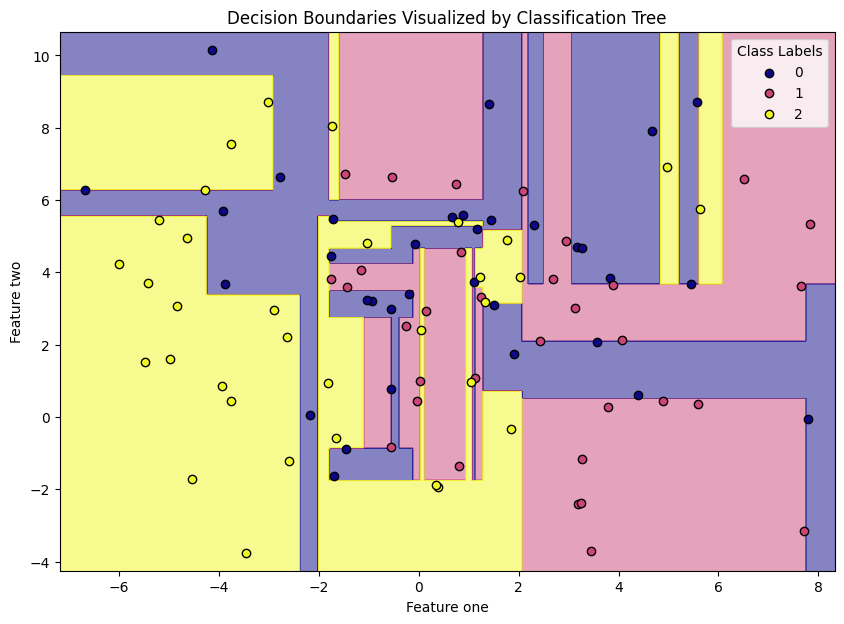

In [2]:
X,y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=3, random_state=0)
tree = ClassificationTree()
tree.fit(X, y)

# Evaluate model performance on training data
pred_Y = np.array([tree.predict_class(x) for x in X])
evaluate_model(y, pred_Y)

# Plot decision boundary and class labels
create_contour_plot(tree, X, y, resolution=500)

In [3]:
X.shape, y.shape, X.dtype, y.dtype

((100, 2), (100,), dtype('float64'), dtype('int32'))

#### Implement Classification Tree on Predicting Marketing Target

In [4]:
# Load Data
market_data = pd.read_csv('./dataset/Social_Network_Ads.csv', header=0)

# Remove the First Column
market_data = market_data.drop(market_data.columns[0], axis=1)

# Training Set
train_X = market_data.iloc[0:300, 0:-1].values
train_Y = market_data.iloc[0:300:, -1].values

# Test Set
test_X = market_data.iloc[300:, 0:-1].values
test_Y = market_data.iloc[300:, -1].values

# Standardize the Features for Both Training Set and Test Set
# scaler = StandardScaler()

# train_X = scaler.fit_transform(train_X)
# test_X = scaler.transform(test_X)

In [5]:
tree = ClassificationTree()
tree.fit(train_X, train_Y)

# Evaluate model performance on training data
pred_Y = np.array([tree.predict_class(x) for x in train_X])
evaluate_model(test_Y, pred_Y)

# Plot the decision boundary and the true labels
create_contour_plot(tree, train_X, train_Y, resolution=500)

UnboundLocalError: cannot access local variable 'best_left' where it is not associated with a value